# Linear Regression: Real Estate House Prices Analysis & Prediction

### 1. Problem & Goals
Recently, Housing Market in Canada is more volatile due to Covid. There are more people looking for homes and condos, and prices continue to rise. However, there are plenty of instances of housing being more expensive than its market value. Therefore, It is beneficial to take a deep dive into a pipeline of housing price prediction from analyzing the selected features of a house for better home buying experience.

Real Estate market prices are impacted by various factors, to name a few, how old is the house, and how convenient it is to nearby stores. It is efficient for us to quickly evaluate the housing prices for agencies or compare Price/performance ratio for home buyers. 

The Goal here is to explore the relationships between each factors in the dataset and train the model to predict the housing prices from the features

### 2. Dataset
The dataset is from the UCI Machine Learning Repository. It is real data taken from New Taipei City, Taiwan, the original owner is Prof. I-Cheng Yeh. I used this dataset to test the example of correlation of each features and illustrate the underlying ideas. This pipeline could be applied to any current housing market to create an finetuned model according to the local market such as Toronto market.


The dataset includes 6 features "X", and labels "y" as the price of houses per unit area to better assess the price of a house

Features:
- Transaction date
- House age
- Distance to the nearest MRT station
- number of convenience stores
- latitude
- longitude

### 3. Data Preprocessing
This dataset is not cleaning heavy as there aren't many instances and features. However, data preprocessing should including checking and eliminating nans

### Import the necessary libraries


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn

### Read the csv data into a pandas dataframe and display the first 5 samples

In [64]:
df = pd.read_csv("Real estate.csv")
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Check if any features have missing data

In [57]:
missing_values = ["Nan"]
df = pd.read_csv("Real estate.csv", na_values = missing_values)
#show all the missing values of each collum in numbers(quantity)
df.isnull().sum(axis=0)

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

### Group all the features as dependent features in X

In [26]:
X = df.iloc[:, :7]
print(X)

      No  X1 transaction date  X2 house age  \
0      1             2012.917          32.0   
1      2             2012.917          19.5   
2      3             2013.583          13.3   
3      4             2013.500          13.3   
4      5             2012.833           5.0   
..   ...                  ...           ...   
409  410             2013.000          13.7   
410  411             2012.667           5.6   
411  412             2013.250          18.8   
412  413             2013.000           8.1   
413  414             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4                                 3

### Group feature(s) as independent features in y

In [27]:
y = df.iloc[:, 7:8]
print(y)

     Y house price of unit area
0                          37.9
1                          42.2
2                          47.3
3                          54.8
4                          43.1
..                          ...
409                        15.4
410                        50.0
411                        40.6
412                        52.5
413                        63.9

[414 rows x 1 columns]


### Split the dataset into train and test data

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Data Exploration & Pattern Identification
Looking at data for patterns and comprehend the data before any training happens to get a deeper layer of understanding of the data or the feature fed in to the model. 

In this case, we will investigate how each feature relates to the house prices and set an assuption before the training and prediction happens

### What are the features available in the dataset?

In [6]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


### Find how many samples are there and how many columns are there in the dataset

In [5]:
df.shape()

(414, 8)

### Plot Transaction Date Vs Price

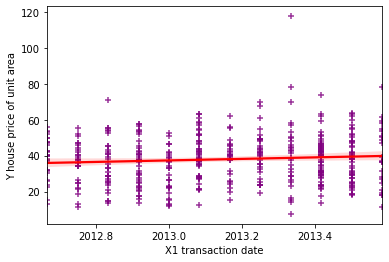

In [17]:
ax = sns.regplot(x="X1 transaction date", y="Y house price of unit area", data=df, scatter_kws={"color": "purple"}, line_kws={"color": "red"}, marker="+")

### Plot House Age Vs Price

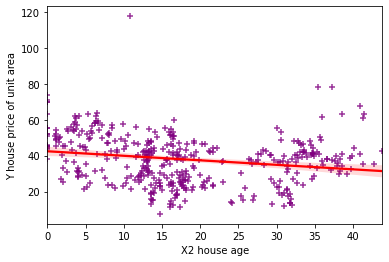

In [18]:
ax = sns.regplot(x="X2 house age", y="Y house price of unit area", data=df, scatter_kws={"color": "purple"}, line_kws={"color": "red"}, marker="+")

### Plot Distance to MRT station Vs Price

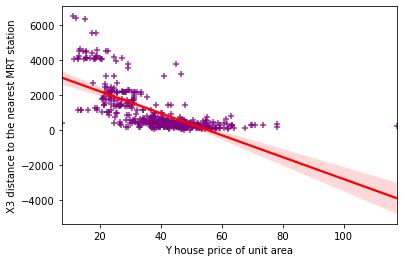

In [19]:
ax = sns.regplot(y="X3 distance to the nearest MRT station", x="Y house price of unit area", data=df, scatter_kws={"color": "purple"}, line_kws={"color": "red"}, marker="+")

### Plot Number of Convienience Stores Vs Price

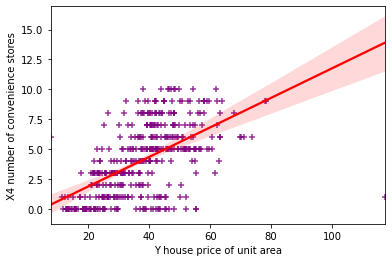

In [20]:
ax = sns.regplot(y="X4 number of convenience stores", x="Y house price of unit area", data=df, scatter_kws={"color": "purple"}, line_kws={"color": "red"}, marker="+")

### 5. Training and Predictions

### Check if any features have missing data

### Choose the model (Linear Regression)

In [21]:
from sklearn.linear_model import LinearRegression

### Create an Estimator object

In [22]:
model = LinearRegression(fit_intercept=True)

### Train the model

In [32]:
model.fit(X_train,y_train)

LinearRegression()

### Apply the model

In [53]:
y_pred = model.predict(X_test)
y_pred

array([[39.94292224],
       [13.18485718],
       [42.04732032],
       [11.86760772],
       [42.63287394],
       [38.89551748],
       [40.99138464],
       [35.80458122],
       [50.97836212],
       [45.87299229],
       [45.37340388],
       [42.0888666 ],
       [39.0139959 ],
       [40.16548187],
       [46.59014898],
       [39.42417847],
       [39.70359128],
       [42.49295231],
       [42.58874763],
       [42.47939411],
       [48.95584591],
       [32.81712211],
       [39.00042724],
       [47.02923203],
       [47.14603912],
       [43.10368488],
       [46.51362552],
       [26.19190059],
       [47.52448319],
       [21.14931617],
       [44.19956621],
       [35.44660237],
       [44.45246336],
       [40.17013801],
       [43.6170064 ],
       [31.83625187],
       [46.84006051],
       [40.80230864],
       [53.56831243],
       [ 6.98328976],
       [51.72824206],
       [34.44853365],
       [33.81714307],
       [48.39341082],
       [14.95719662],
       [44

### Display the coefficients

In [35]:
model.coef_

array([[-6.92032299e-03,  5.07059601e+00, -2.73884294e-01,
        -4.64185077e-03,  1.00307806e+00,  2.28365353e+02,
        -9.52676221e+00]])

### Find how well the trained model did with testing data

In [37]:
r2score = sklearn.metrics.r2_score(y_test, y_pred)
print(r2score)

0.5710302953097005
